## Imports

In [10]:
# Python standard library
import sys
import os
import csv
import array
import struct

# Scipy, etc.
import scipy.interpolate
import numpy as np
import matplotlib.pyplot as plt
import cv2
import operator

from PIL import Image 

# Program specific
PORE_STATS_BASE_DIRECTORY = os.getcwd().replace('notebooks', '')
sys.path.append(PORE_STATS_BASE_DIRECTORY + '/pore_stats/rp/')
sys.path.append(PORE_STATS_BASE_DIRECTORY + '/pore_stats/oi/')

#PORE_STATS_BASE_DIRECTORY = os.getcwd().replace('notebooks', '')
#sys.path.append(PORE_STATS_BASE_DIRECTORY + '/pore_stats/oi/')
#sys.path.append(PORE_STATS_BASE_DIRECTORY + '/pore_stats/rp/')

import resistive_pulse as rp
import rp_file
import optical_imaging as oi
import oi_file

# Jupyter
from IPython.display import HTML

## Open Data

### File Info

In [2]:
date = '11-30-2017/'
particle = '293-T_0/'
channel = '20-10x150_2'
file_index = '0'

base_path = oi_file.data_base_path


base_directory = base_path+date+particle+channel

### Open RP

In [3]:
rp_fps = 250000.


# RP data files
#rp_data_file_directory = base_directory + '/rp/bts/'
rp_data_file_directory = base_directory + '/rp/bts/'

rp_data_file_name = 'test_rp_'+file_index+'.bts'
rp_data_file_path = rp_data_file_directory + rp_data_file_name

rp_data = rp_file.get_data(rp_data_file_path)



# RP event files
rp_events_file_directory = base_directory + '/rp/events/'
rp_events_file_name = 'test_rp_' + file_index + '_events_sync.json'
rp_events_file_path = rp_events_file_directory + rp_events_file_name

rp_events = rp_file.open_event_file_json(rp_events_file_path)

### Open OI

In [4]:
oi_res_x = 384
oi_res_y = 112
oi_fps = 250000.
oi_exp = 1

# OI data files
oi_vid_file_directory = base_directory + '/oi/bin/'
oi_vid_file_name = 'test_camera_' + file_index
oi_vid_file_path = oi_vid_file_directory + oi_vid_file_name

oi_vid = oi_file.Video(oi_vid_file_path, oi_res_x, oi_res_y, oi_fps, oi_exp)


# OI event files
oi_events_file_directory = base_directory + '/oi/events/'
oi_events_file_name = 'test_camera_' + file_index + '_events_sync.json'
oi_events_file_path = oi_events_file_directory + oi_events_file_name

oi_events = oi_file.open_event_file_json(oi_events_file_path)

In [5]:
print "#rp: ", len(rp_events)
print "#oi: ", len(oi_events)

#rp:  46
#oi:  45


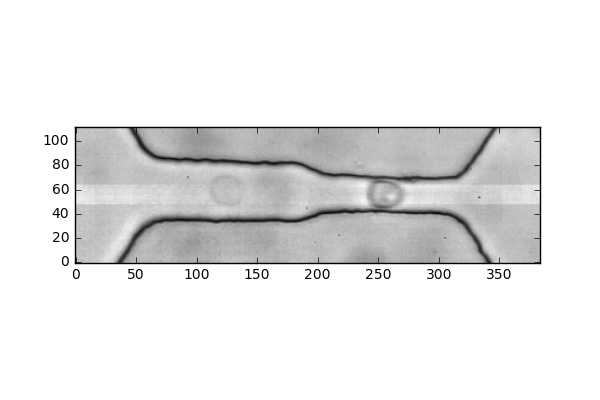

In [131]:
Image.blend(im3,Image.blend(im2,im1,alpha=.2),alpha=.2)

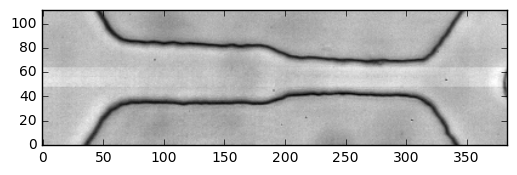

In [73]:

#plt.imshow(oi_vid.get_frame(int(oi_event.get_tf()[6])),cmap = 'gray',origin = 'lower')
plt.imshow(oi_vid.get_frame(int(oi_event.get_tf()[32])),cmap = 'gray',origin = 'lower')
plt.savefig('C:/Users/SiwyLab/Desktop/Cody/cell_research/paper/' +  'im4')
plt.show()

In [75]:
im2 = Image.open('C:/Users/SiwyLab/Desktop/Cody/cell_research/paper/' +  'im2.png')
im1 = Image.open('C:/Users/SiwyLab/Desktop/Cody/cell_research/paper/' +  'im1.png')
im3 = Image.open('C:/Users/SiwyLab/Desktop/Cody/cell_research/paper/' +  'im3.png')
im4 = Image.open('C:/Users/SiwyLab/Desktop/Cody/cell_research/paper/' +  'im4.png')

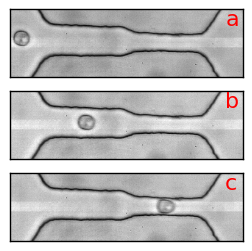

In [132]:
event_num = 28
oi_event = oi_events[event_num]
index_pos = [6,16,23]
ts = oi_event.get_tf()[index_pos]
n = len(ts)
fig, axes = plt.subplots(n,1,figsize = (3,3))

for i in range(n):
    frame = oi_vid.get_frame(int(ts[i]))
    plt.sca(axes[i])
    plt.imshow(frame, cmap = 'gray',origin = 'lower')
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.annotate('a',(355,85),color = 'red',size =16)
    if i == 1:
        plt.annotate('b',(355,85),color = 'red',size =16)
    if i == 2:
        plt.annotate('c',(355,85),color = 'red',size =16)
plt.savefig('C:/Users/SiwyLab/Desktop/Cody/cell_research/paper/' +  'rp_images')
plt.show()

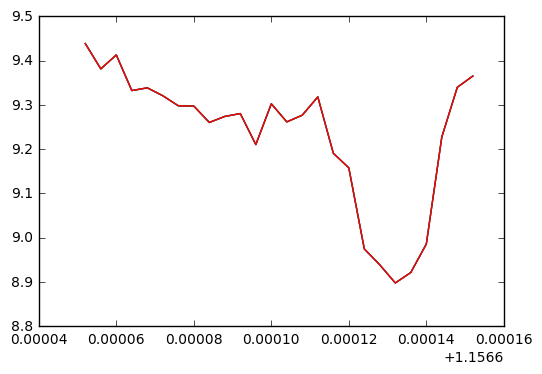

In [137]:
plt.plot(rp_t,rp_y)
plt.show()

In [202]:
(np.array(rp_t)-1.156652)*10**6

array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
        44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
        88.,  92.,  96., 100.])

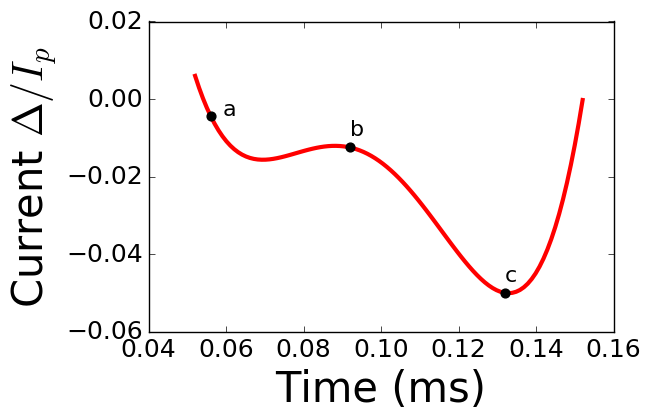

In [295]:
# Plot a curve over data points

rp_t = np.array([d[0] for d in rp_events[event_num]._data])*1000-1156.6
rp_y1 = [d[1] for d in rp_events[event_num]._data]


rp_y = (rp_y1-np.max(rp_y1))/rp_y1

rp_y_fit = np.polyfit(rp_t, rp_y, 4)

p = np.poly1d(rp_y_fit)
xp = np.linspace(rp_t[0], rp_t[-1], 100)

plt.close()

plt.plot(xp, p(xp),zorder=1,color='red',lw=3)


x = rp_t[np.argmin(rp_y)]
y = p(x)

plt.scatter(x, y,color='black',s=40,zorder=2)
plt.annotate('c' ,(x,y+.003),size = 16)

x = rp_t[np.argmin(rp_y)]-10./250.
y = p(x)

plt.scatter(x, y,color='black',s=40,zorder=2)
plt.annotate('b' ,(x,y+.003),size = 16)

x = rp_t[np.argmin(rp_y)]-19./250.
y = p(x)

plt.scatter(x, y,color='black',s=40,zorder=2)
plt.annotate('a' ,(x+.003,y),size = 16)


x = rp_t[np.argmin(rp_y)]
y = p(x)

plt.xlabel('Time (ms)',size=30)
plt.ylabel('Current '+ r'$\Delta/I_p$', size = 30)

plt.xticks(fontsize = 18)
plt.yticks(fontsize=18)

plt.locator_params(nbins=5, axis='y')

plt.savefig('C:/Users/SiwyLab/Desktop/Cody/cell_research/paper/' +  'rp_signal',bbox_inches = 'tight')
plt.show()


In [210]:
p(rp_t[20])

8.9892711639404297

## Video

In [6]:
import matplotlib.animation

In [7]:
def crop_frame(frame, px, py, crop_distance):    
    x0 = int(px - crop_distance)
    x1 = int(px + crop_distance)
    y0 = int(py - crop_distance)
    y1 = int(py + crop_distance)
    cropped_frame = np.copy(frame)[y0:y1, x0:x1]
    
    return cropped_frame

In [8]:
def make_animation2(vid, t0, t1, oi_fps, event, rp_event):

    template_frame = vid.get_frame(0)
    
    px = [event._detections[i]._px for i in range(len(event._detections))]
    py = [event._detections[i]._py for i in range(len(event._detections))]
    
    # rp curve

    
    max_px = np.max(px)
    rx = [rp[0] for rp in rp_event._data]
    ry = [rp[1] for rp in rp_event._data]
    #ry = [rp[1]*(.1/np.abs(rp_event._data[-1][1]-rp_event._data[0][1])) for rp in rp_event._data]
    #rx = [rp[0]*(1/np.abs(rp_event._data[-1][0]-rp_event._data[0][0])) for rp in rp_event._data]
    rx = np.linspace(0,len(template_frame[0]),len(ry))
    

    
    dim = template_frame.shape

    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()
    line, = ax.plot([], [], 'b--', lw=2)


    plot = ax.imshow(vid.get_frame(t0), cmap = 'gray', origin = 'lower')

    def init():
        plot.set_data(vid.get_frame(t0))
        line.set_data([], [])
        plt.xticks([])
        plt.yticks([])
        #plt.xlim(100, 412)
        #plt.ylim(200, 288)
        return (plot, line)


    # animation function. This is called sequentially
    texts = []
    #annotations = []
    def animate(i):
        frame = vid.get_frame(i)

        n = len(frame[0])
        empty_array = np.ones((len(frame),len(frame[0])+n))

        #empty_array[:,:-n] = frame
        #plot.set_data(empty_array)
        plot.set_data(frame)
        #try:
        #    for a in annotations:
        #        a.set_visible(False)
        #    new_annotation = plt.annotate('cell', color = 'red', size = 20, xy=(px[int(i-t0)], py[int(i-t0)]-12), xytext = (px[int(i-t0)],80), arrowprops=dict(facecolor='red', shrink=0.05), fontsize = 20)
        #    annotations.append(new_annotation)
        #except:
        #    pass
        #line.set_data(px[0:int(i-t0+1)], py[0:int(i-t0+1)])
        
        
        
        line.set_data(rx[0:int(i-t0+1)], ry[0:int(i-t0+1)])
        #new_text = plt.text(0.5, 0.95, 'frame='+str(int(i-t0))+'/'+str(int(t1-t0))+'\nt='+str(round(1000.*(i-t0)/(1.*oi_fps), 2))+'ms',\
        # color = 'red', size = 20, ha = 'center', va = 'top', transform = ax.transAxes)


        # Hack to replace text... this just sets the old text to invisible
        #for text in texts:
        #    text.set_visible(False)
        #texts.append(new_text)
        plt.xticks([])
        plt.yticks([])

        #plt.xlim(50, 490)
        #plt.ylim(95, 288)
        return (plot, line)

    # call the animator. blit=True means only re-draw the parts that have changed.
    #anim = matplotlib.animation.FuncAnimation(fig, animate, np.arange(t0, t1), init_func=init, interval=200, blit=True)
    anim = matplotlib.animation.FuncAnimation(fig, animate, np.arange(t0, t1, dtype = np.uint64), interval=200, blit=False)

    return anim

In [9]:
# Video
oi_index = 7
oi_event = oi_events[oi_index]
rp_event = rp_events[oi_index]
add_frames = 0
reload(oi_file)
plt.close()

HTML(make_animation2(oi_vid, oi_event._detections[0]._tf, oi_event._detections[-1]._tf + add_frames, oi_fps, oi_event, rp_event).to_html5_video())

In [104]:
oi_index = 19
oi_event = oi_events[oi_index]
reload(oi_file)
plt.close()


#oi_file.make_animation(oi_vid, oi_event._detections[0]._tf, oi_event._detections[-1]._tf, oi_fps).save('test.mp4')
HTML(oi_file.make_animation(oi_vid, oi_event._detections[0]._tf, oi_event._detections[-1]._tf, oi_fps).to_html5_video())

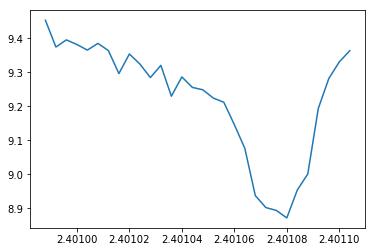

In [105]:
rp_t = [d[0] for d in rp_events[oi_index]._data]
rp_y = [d[1] for d in rp_events[oi_index]._data]

plt.close()
plt.plot(rp_t, rp_y)
plt.show()

C:\Users\Aaron\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


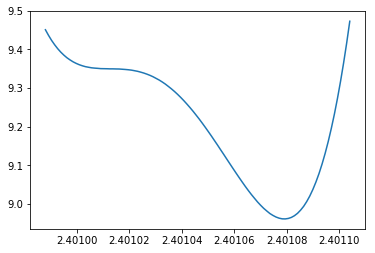

In [106]:
# Plot a curve over data points

rp_t = [d[0] for d in rp_events[oi_index]._data]
rp_y = [d[1] for d in rp_events[oi_index]._data]

rp_y_fit = np.polyfit(rp_t, rp_y, 300)

p = np.poly1d(rp_y_fit)
xp = np.linspace(rp_t[0], rp_t[-1], 100)

plt.close()
plt.plot(xp, p(xp))
plt.show()

In [39]:
oi_index = 14
oi_event = oi_events[oi_index]
px = [oi_event._detections[i]._tf for i in range(len(oi_event._detections))]

rp_t = [d[0] for d in rp_events[oi_index]._data]

#print (px[-1]-px[0])/250000.
#print rp_t[-1]-rp_t[0]

b = 0
print (oi_event._detections[b]._tf)/250000.
print rp_t[b]
for b in range(100):
    oi_event = oi_events[b]
    rp_t = [d[0] for d in rp_events[b]._data]
    #print 'Difference:', np.abs(((oi_event._detections[0]._tf)/250000.)-rp_t[0])
    print 'Time Difference:', np.abs(((oi_event._detections[0]._tf-oi_event._detections[-1]._tf)/(rp_t[0]-rp_t[-1])))

0.069224
2.394564
Time Difference: 318965.517242
Time Difference: 220930.232558
Time Difference: 319999.999999
Time Difference: 443181.818182
Time Difference: 416666.666666
Time Difference: 250000.0
Time Difference: 358108.108107
Time Difference: 227272.727272
Time Difference: 342592.592593
Time Difference: 177631.578947
Time Difference: 351851.851852
Time Difference: 522727.272725
Time Difference: 216981.132076
Time Difference: 294117.647059
Time Difference: 437500.0
Time Difference: 198863.636363
Time Difference: 1125000.0
Time Difference: 312500.0
Time Difference: 81597.2222222
Time Difference: 301724.13793
Time Difference: 888888.888885
Time Difference: 950000.000001
Time Difference: 150000.0
Time Difference: 339999.999999
Time Difference: 482142.857144
Time Difference: 250000.0
Time Difference: 447368.421053
Time Difference: 509615.384614
Time Difference: 266129.032258
Time Difference: 333333.333333
Time Difference: 369565.217391
Time Difference: 390000.000001
Time Difference: 168

In [12]:
print oi_events[oi_index].__dict__.keys()

['_channel_exit_tf', '_detections', '_channel_enter_tf', '_channel_enter_index', '_channel_exit_index']


In [13]:
print rp_events[oi_index].__dict__

{'_minima': None, '_amplitude': 0.3604800000000008, '_baseline': array([ 2.390604  ,  9.41543094,  9.29287046,  9.53799142]), '_maxima': None, '_extrema': None, '_data': array([[ 2.394564,  9.42699 ],
       [ 2.394568,  9.32835 ],
       [ 2.394572,  9.36307 ],
       [ 2.394576,  9.30337 ],
       [ 2.39458 ,  9.32576 ],
       [ 2.394584,  9.31765 ],
       [ 2.394588,  9.29818 ],
       [ 2.394592,  9.31375 ],
       [ 2.394596,  9.3011  ],
       [ 2.3946  ,  9.30499 ],
       [ 2.394604,  9.28423 ],
       [ 2.394608,  9.20116 ],
       [ 2.394612,  9.28293 ],
       [ 2.394616,  9.31602 ],
       [ 2.39462 ,  9.26963 ],
       [ 2.394624,  9.25081 ],
       [ 2.394628,  9.13951 ],
       [ 2.394632,  9.12232 ],
       [ 2.394636,  9.06651 ],
       [ 2.39464 ,  9.08954 ],
       [ 2.394644,  9.1155  ],
       [ 2.394648,  9.2534  ],
       [ 2.394652,  9.35042 ],
       [ 2.394656,  9.34652 ],
       [ 2.39466 ,  9.38514 ]]), '_id': u'685', '_duration': 9.6000000000096009e-05}
